<a href="https://colab.research.google.com/github/sozkaynak/Machine-Learning-with-Python/blob/master/XgbootsDiabetesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib as mpl

from skfeature.function.information_theoretical_based.MRMR import mrmr

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import precision_score, accuracy_score,mean_squared_error,f1_score
from sklearn import datasets

from xgboost import XGBClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
data= pd.read_csv('Churn_Modelling.csv')
X,y = data.iloc[:,3:13].values,data.iloc[:,13].values

In [0]:
#encoder:  Kategorik -> Numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[1])
X=ohe.fit_transform(X).toarray()
X = X[:,1:]

In [1]:
#for Regression
k=X.shape[1]
print(k)
kSet=list(range(1,k+1))
print(kSet)
for i in kx:
  kwargs_u={"n_selected_features":i}
  X1= mrmr(X,y, **kwargs_u)
  X2=X1[0][:][:]
  print("Seçili öznitelikler listesi:", X2)
  x=X[:,X2]
  
  data_dmatrix = xgb.DMatrix(data=x,label=y)
  
  #for trand and test split
  x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
  
  #for use to Regression in Xgboots 
  xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
  xg_reg.fit(x_train,y_train)

  predsReg= xg_reg.predict(x_test)
  print("kwargs_u:",kwargs_u,"için tahmin:",predsReg)
  
  #for Mean Squared Error
  rmse = np.sqrt(mean_squared_error(y_test, predsReg))
  print("kwargs_u:",kwargs_u,"için RMSE: %f" % (rmse))
   
  #k-fold Cross Validation using XGBoost
  params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

  cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
  
  cv_results.head()
  print((cv_results["test-rmse-mean"]).tail(1))
  
  #for Visualizations
  #xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
  #xgb.plot_tree(xg_reg,num_trees=0)
  #plt.rcParams['figure.figsize'] = [50, 10]
  #plt.show()
  
  #xgb.plot_importance(xg_reg)
  #plt.rcParams['figure.figsize'] = [5, 5]
  #plt.show()

NameError: ignored

In [8]:
#for Classification
k=X.shape[1]
print(k)
kSet=list(range(1,k+1))
print(kSet)
rmseSet=[]
f1_macroSet=[]
f1_microSet=[]
f1_weightSet=[]
for i in kSet:
  kwargs_u={"n_selected_features":i}
  X1= mrmr(X,y, **kwargs_u)
  X2=X1[0][:][:]
  x=X[:,X2]
  
  data_dmatrix = xgb.DMatrix(data=x,label=y)
 
  x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
  
  classifier = xgb.XGBClassifier()
  classifier.fit(x_train, y_train)
  predsCls = classifier.predict(x_test)
  """print("kwargs_u:",kwargs_u,"için tahmin:",predsCls)"""
  
  #Confusion Matrix
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_test, predsCls)
  
  #Mean Squared Error
  rmse = np.sqrt(mean_squared_error(y_test, predsCls))
  """print("kwargs_u:",kwargs_u,"için RMSE: %f" % (rmse))"""
  rmseSet.append(rmse)

  #for f1 scorrer
  f1_macro=f1_score(y_test, predsCls, average='macro')
  """print("kwargs_u:",kwargs_u,"için f1_macro:",f1_macro)"""
  f1_macroSet.append(f1_macro)

  f1_micro=f1_score(y_test, predsCls, average='micro')
  """print("kwargs_u:",kwargs_u,"için f1_micro:",f1_micro)"""
  f1_microSet.append(f1_micro)

  f1_weight=f1_score(y_test, predsCls, average='weighted')  
  """print("kwargs_u:",kwargs_u,"için f1_weight:",f1_weight)"""
  f1_weightSet.append(f1_weight)
  
  #f1_none=f1_score(y_test, predsCls, average=None)
  """print("kwargs_u:",kwargs_u,"için f1_none:",f1_none)"""
  
  #k-fold Cross Validation using XGBoost
  params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

  cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
  
  cv_results.head()
  """print((cv_results["test-rmse-mean"]).tail(1))"""
 
  """xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
  xgb.plot_tree(xg_reg,num_trees=0)
  plt.rcParams['figure.figsize'] = [50, 10]
  plt.show()
  
  xgb.plot_importance(xg_reg)
  plt.rcParams['figure.figsize'] = [5, 5]
  plt.show()"""


11
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

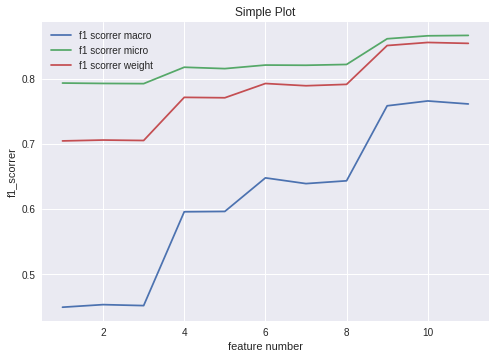

In [9]:
plt.plot(kSet, f1_macroSet, label='f1 scorrer macro')
plt.plot(kSet, f1_microSet, label='f1 scorrer micro')
plt.plot(kSet, f1_weightSet, label='f1 scorrer weight')

plt.xlabel('feature number')
plt.ylabel('f1_scorrer')

plt.title("Simple Plot")

plt.legend()

plt.show()

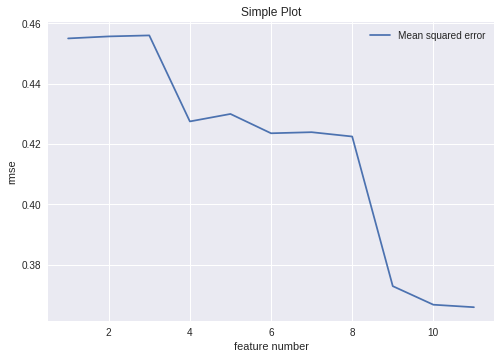

In [10]:
plt.plot(kSet, rmseSet, label='Mean squared error')
plt.xlabel('feature number')
plt.ylabel('rmse')
plt.title("Simple Plot")
plt.legend()
plt.show()